Importing all necessary libraries

In [1]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.neighbors import KNeighborsClassifier

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Import csv file into a DataFrame

In [2]:
df = pd.read_csv(r'C:\Users\rajit\OneDrive\Desktop\Find Everything Here\Internship stuff\Academor stuff\loan-prediction.csv')

Cleaning the Data and Visualisation

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  Gender_Male  Married_Yes  Dependents_1  Dependents_2  Dependents_3+  Education_Not Graduate  Self_Employed_Yes  Property_Area_semiurban  Property_Area_urban  Loan_Status_Y
1               4583        1508.000000       128.0             360.0             1.0         True         True          True         False          False                   False              False                    False                False          False
2               3000           0.000000        66.0             360.0             1.0         True         True         False         False          False                   False               True                    False                 True           True
3               2583        2358.000000       120.0             360.0             1.0         True         True         False         False          False                    True              False                    False 

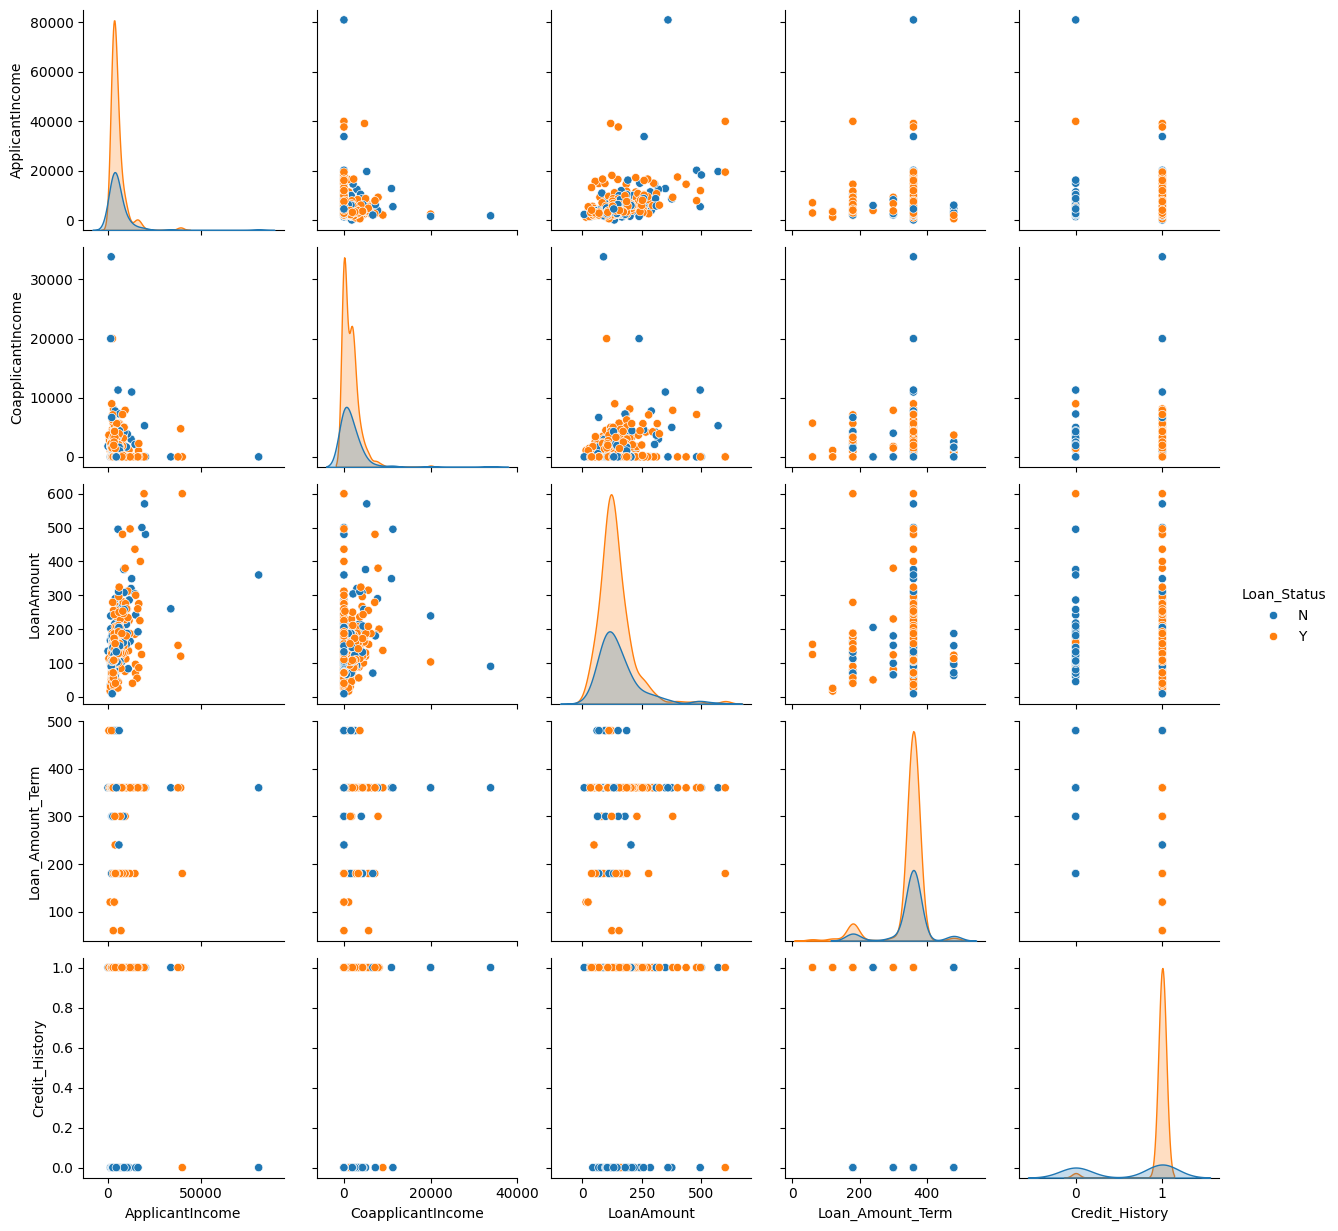

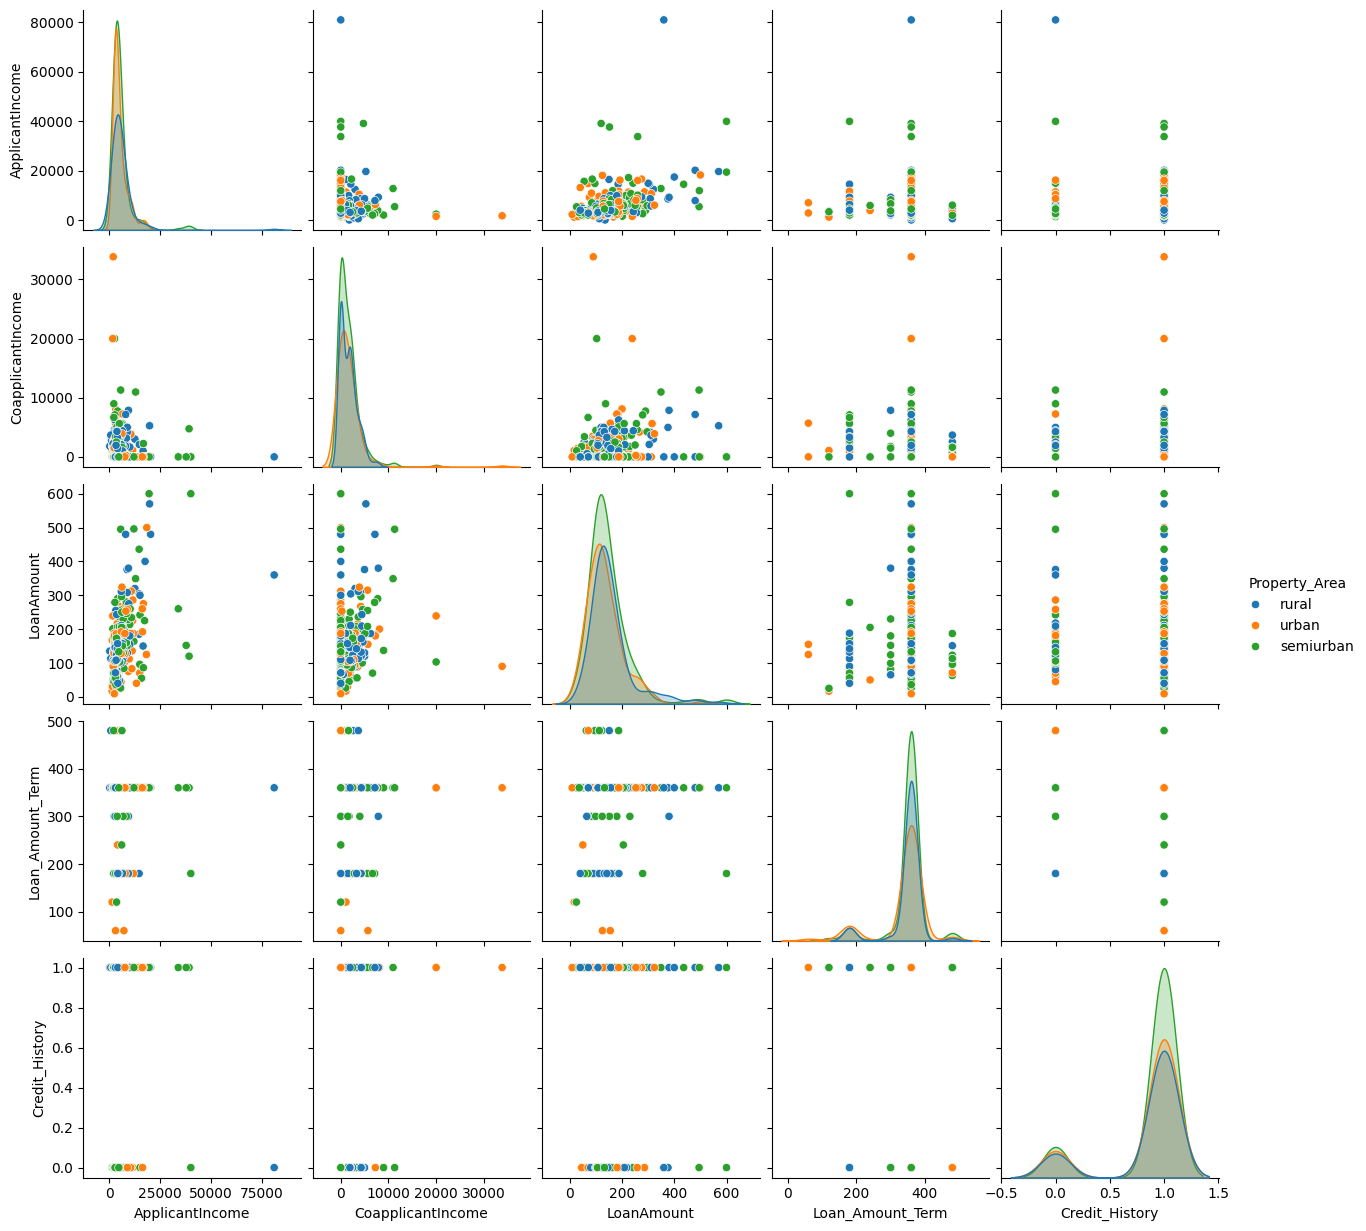

In [3]:
df.dropna(inplace=True) # Removing null values

# Removing insignificant columns
df = df.drop('Loan_ID', axis=1) 


for x in df.index: # Removing all the Amount Terms that are not possible
  if df.loc[x, "Loan_Amount_Term"] % 60 != 0:
    df.drop(x, inplace=True)

# Turning Property area column entries into lowercase and removing special characters
df['Property_Area'] = df['Property_Area'].apply(lambda x: x.lower() if isinstance(x, str) else x)
df['Property_Area'] = df['Property_Area'].apply(lambda x: ''.join(char for char in x if char.isalnum() or char.isspace()))

df.drop_duplicates(inplace = True) # Delete duplicate datapoints (if any)

sns.pairplot(df, hue="Loan_Status") # Visualising data
sns.pairplot(df, hue="Property_Area")



numeric_df = pd.get_dummies(df, drop_first=True) # String -> Boolean

print(numeric_df.to_string())




Dividing data into training and test data

In [4]:
x = numeric_df.drop('Loan_Status_Y', axis=1) # Independent variables
y = numeric_df['Loan_Status_Y'] # Dependent variable

# Splitting training and test data in a 20% - 80% split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.8, stratify=y, random_state=69)


Building the decision tree model and fitting it on the dataset

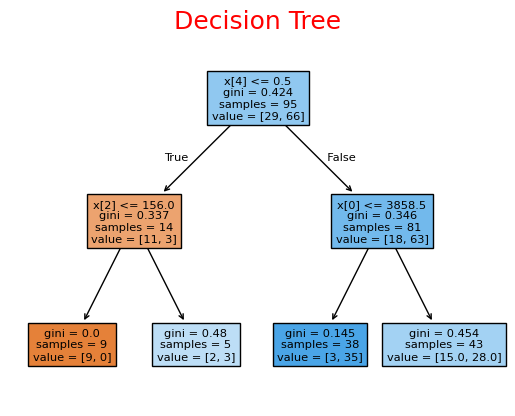

In [5]:
# Building the decision tree classifier

model = DecisionTreeClassifier(max_depth=2, random_state=100) 

# Fitting the model onto the training data
model.fit(x_train, y_train)

plot_tree( # Plotting the decision tree
    model,
    filled=True
)

# Showing the decision tree

plt.title("Decision Tree", size=18, color="red")
plt.savefig('testfig.svg', format='svg')
plt.show()




Testing the model and finding the accuracy of the model on test and training data + Creating a confusion matrix for both

Accuracy on test 0.7763157894736842


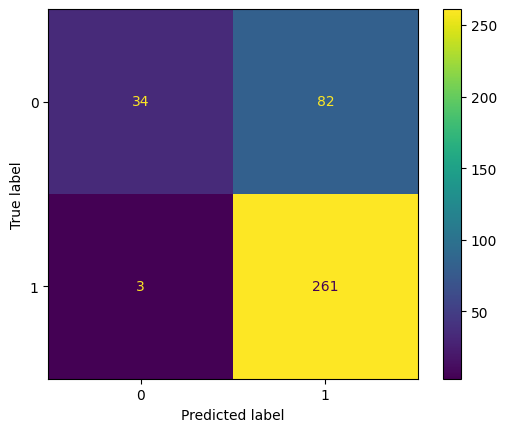

Accuracy on train 0.7894736842105263


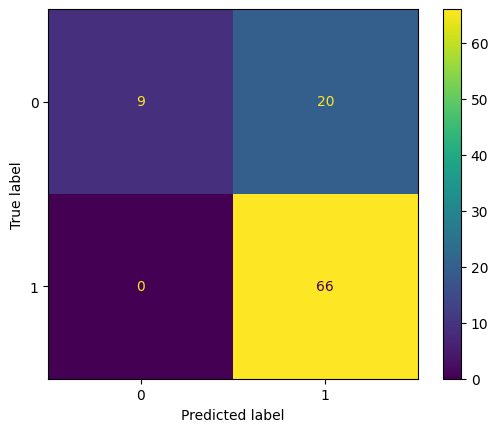

In [6]:
# Model prediction and accuracy measurment on test data
y_pred = model.predict(x_test)  
print("Accuracy on test", metrics.accuracy_score(y_test, y_pred))

# Confusion matrix for test data
confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

# Show confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

# Model prediction and accuracy measurment on train data 
y_pred=model.predict(x_train)
print("Accuracy on train", metrics.accuracy_score(y_train, y_pred))

# Confusion matrix for train data
confusion_matrix = metrics.confusion_matrix(y_train, y_pred)

# Show confusion matrix
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])
cm_display.plot()
plt.show()

According to my analysis, the main points that seem to matter are: 
    1) Credit Score
    2) Urban/Semiurban or Rural
    3) Gender

The rest of the data seems to have minimal amount of influence on the validity of a loan, though not zero, and thus are not excluded from the training datatset

In the current model, the optimal decision tree depth is 2, as more seems to lead to overfitting, thus making test predictions less accurate compared to training data, while at depth 2, they are relative to each other